# Data Visualisation

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('TMDB_movie_dataset_cleaned.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,245891,John Wick,7.421,17923,Released,2014-10-22,88761661,101,False,/7dzngS8pLkGJpyeskCFcjPO9qLF.jpg,...,John Wick,Ex-hitman John Wick comes out of retirement to...,55.739,/fZPSd91yGE9fCcCe6OoQr6E3Bev.jpg,Don't set him off.,"Action, Thriller","87Eleven, DefyNite Films, MJW Films, Thunder Road",United States of America,"Hungarian, English, Russian","hitman, bratva (russian mafia), gangster, secr..."
1,244786,Whiplash,8.381,13891,Released,2014-10-10,13092000,107,False,/vNXGrknx4GjWLgmuNTftWZluIUl.jpg,...,Whiplash,"Under the direction of a ruthless instructor, ...",54.495,/7fn624j5lj3xTme2SgiLCeuedmO.jpg,The road to greatness can take you to the edge.,"Drama, Music","Bold Films, Blumhouse Productions, Right of Wa...",United States of America,English,"new york city, concert, jazz, obsession, music..."
2,264660,Ex Machina,7.572,12362,Released,2015-01-21,36869414,108,False,/uqOuJ50EtTj7kkDIXP8LCg7G45D.jpg,...,Ex Machina,"Caleb, a coder at the world's largest internet...",26.767,/dmJW8IAKHKxFNiUnoDR7JfsK7Rp.jpg,There is nothing more human than the will to s...,"Drama, Science Fiction","DNA Films, Film4 Productions, IAC Films, Scott...","United Kingdom, United States of America",English,"android, dancing, friendship, distrust, artifi..."
3,398818,Call Me by Your Name,8.167,11367,Released,2017-09-01,43143046,132,False,/zvOJawrnmgK0sL293mOXOdLvTXQ.jpg,...,Call Me by Your Name,"In 1980s Italy, a relationship begins between ...",32.150,/mZ4gBdfkhP9tvLH1DO4m4HYtiyi.jpg,Is it better to speak or die?,"Romance, Drama","La Cinéfacture, RT Features, Frenesy Film, Wat...","Brazil, France, Italy, United States of America","French, English, Italian","based on novel or book, upper class, italy, sw..."
4,242582,Nightcrawler,7.703,10032,Released,2014-10-23,50300000,118,False,/wofhl2lsTYCPmMQPsbj6iu9n0P6.jpg,...,Nightcrawler,"When Lou Bloom, desperate for work, muscles in...",44.274,/j9HrX8f7GbZQm1BrBiR40uFQZSb.jpg,The city shines brightest at night,"Crime, Drama, Thriller","Sierra/Affinity, Bold Films",United States of America,English,"underground, psychopath, journalism, job inter..."


C:\Users\Goh Jun How\AppData\Local\Temp\ipykernel_2220\3555799735.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['release_date'].dt.year


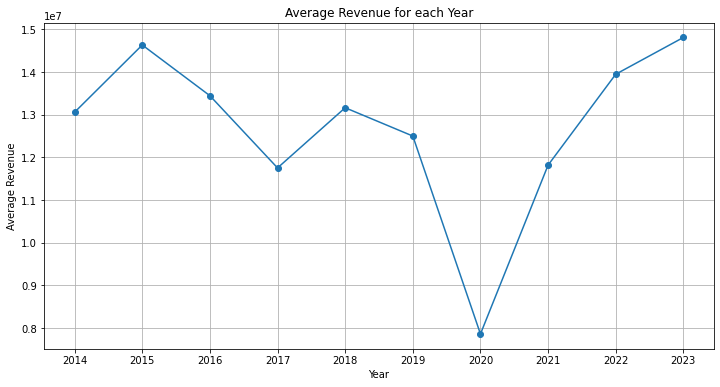

In [90]:
# Ensure release_date is in datetime format and revenue is numeric
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Remove movies released in 2024
filtered_df = df[df['release_date'] <= '2023-12-31']

# Extract year from release_date and group by year to calculate mean revenue
filtered_df['year'] = filtered_df['release_date'].dt.year
revenue_per_year = filtered_df.groupby('year')['revenue'].mean().dropna()

# Plot line graph of average revenue against each year
plt.figure(figsize=(12, 6))
plt.plot(revenue_per_year.index, revenue_per_year.values, marker='o', linestyle='-')
plt.title("Average Revenue for each Year")
plt.xlabel("Year")
plt.ylabel("Average Revenue")
plt.xticks(range(revenue_per_year.index.min(), revenue_per_year.index.max() + 1))
plt.grid(True)
plt.show()

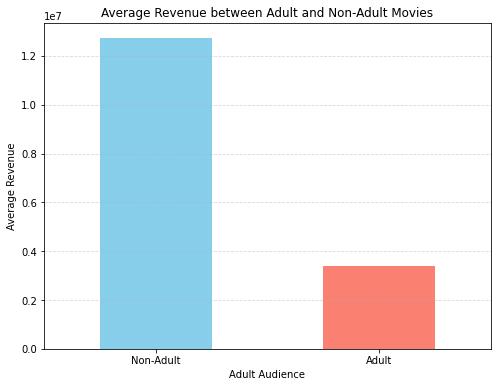

In [112]:
adult_revenue = df.groupby('adult')['revenue'].mean().dropna()

# Plot bar graph of average revenue against adult/non-adult category
plt.figure(figsize=(8, 6))
adult_revenue.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Revenue between Adult and Non-Adult Movies")
plt.xlabel("Adult Audience")
plt.ylabel("Average Revenue")
plt.xticks([0, 1], labels=['Non-Adult', 'Adult'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

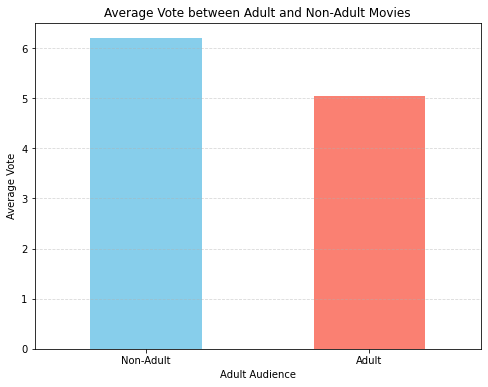

In [113]:
adult_vote = df.groupby('adult')['vote_average'].mean().dropna()

# Plot bar graph of average vote against adult/non-adult category
plt.figure(figsize=(8, 6))
adult_vote.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Vote between Adult and Non-Adult Movies")
plt.xlabel("Adult Audience")
plt.ylabel("Average Vote")
plt.xticks([0, 1], labels=['Non-Adult', 'Adult'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

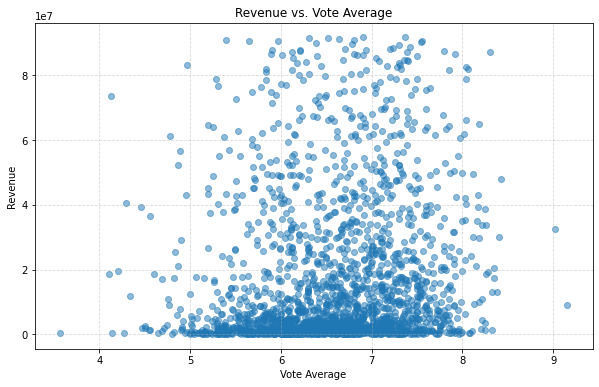

In [120]:
# Filter for vote_count >= 100
filtered_df = df[df['vote_count'] >= 100]

# Scatter plot of revenue against average_vote
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['vote_average'], filtered_df['revenue'], alpha=0.5)
plt.title("Revenue vs. Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Revenue")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()